In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

In [2]:
!head korozija.txt

-97.76 -0.00878
-90.22 -0.00752
-82.66 -0.00655
-75.02 -0.00565
-67.36 -0.00484
-59.76 -0.00410
-52.10 -0.00339
-44.54 -0.00274
-36.76 -0.00212
-29.36 -0.00156


*****FItam model: oskubljen_model
     ******POPT: 
    [-4.79748615e-04  3.30030295e+01  1.93583488e+00]
     ******PCOV: 
    \left[ \begin{array}{ccc}
    8.89e+04&2.18e+03&6.12e+09\\
2.18e+03&1.43e+02&1.5e+08\\
6.12e+09&1.5e+08&4.21e+14\end{array} \right] 
     ******korelacijska matrika:
    \left[ \begin{array}{ccc}
    1.0&0.612&1.0\\
0.612&1.0&0.612\\
1.0&0.612&1.0\end{array} \right] 
     ******reduciran Hi-kvadrat:
    \chi^2_\mathrm{red.} = 3.95e-05
     ******Rišem ........




/home/peter/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


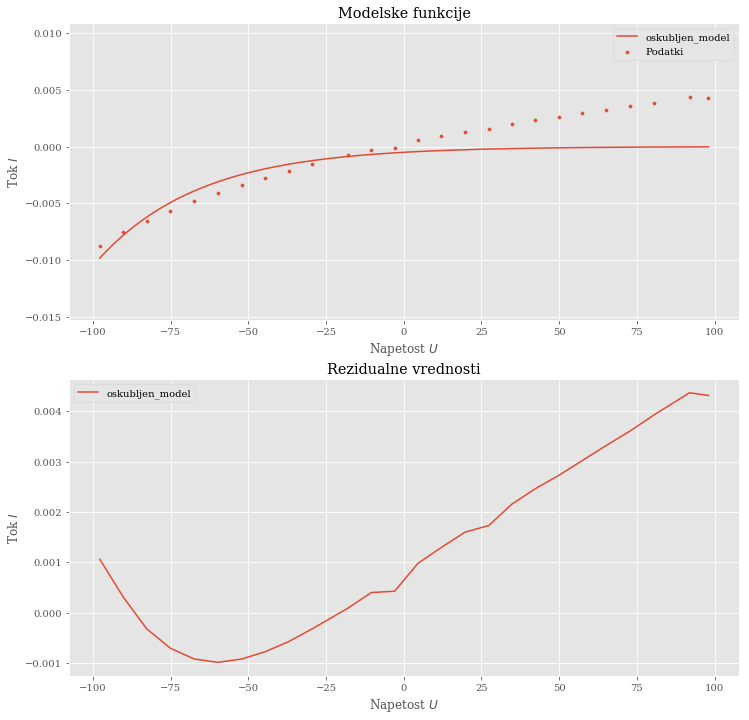

In [23]:
data = np.loadtxt("korozija.txt")
x,y = data[:,0], data[:, 1]
def hikvadrat(yi, xi, model, *args,reduced=True):
    assert yi.shape == xi.shape, "Dimenzije y_i in x_i ne štimajo! (xi.shape != yi.shape)"
    
    if reduced:
        return np.sum((yi - model(xi, *args))**2)/len(args)
    else:
        return np.sum((yi - model(xi, *args))**2)
def kormat(C):
    from numpy.linalg import inv
    D=np.zeros(C.shape)
    np.fill_diagonal(D, np.diag(C))
    D = np.sqrt(D)
    return inv(D) @ C @ inv(D)

def array_to_latex_matrix(arej):
    vrstic = len(arej)
    stolpcev = len(arej[0])
    zacetek =r"""\left[ \begin{{array}}{{{cji}}}
    """.format(cji="c"*stolpcev)
    konec = r"""\end{array} \right] """
    
    vsebina= ""
    for i in range(vrstic):
        for j in range(stolpcev):
            vsebina = vsebina + "{:.3}".format(arej[i][j])
            if not j==stolpcev-1:
                vsebina += r"&"
        if not i == vrstic-1:
            vsebina = vsebina+r"""\\\

"""
    return zacetek + vsebina+ konec

def osnovni_model(x, I0, Ua, Uc):
    return I0 * (
    np.exp(x/Ua)- np.exp(-x/Uc)
    )
def premaknjen_model(x, I0, Ua, Uc, U0):
    return I0 * (
    np.exp((x-U0)/Ua)- np.exp(-(x-U0)/Uc)
    )
def oskubljen_model(x, I0, Uc, U0):
        return I0 * (np.exp(-(x-U0)/Uc))
modelske_funkcije=[osnovni_model, premaknjen_model, oskubljen_model]

plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Modelske funkcije")
plt.xlabel(r"Napetost $U$")
plt.ylabel(r"Tok $I$")
plt.scatter(x,y,label="Podatki", s=10)
plt.legend()

plt.subplot(212)
plt.title("Rezidualne vrednosti")
plt.xlabel(r"Napetost $U$")
plt.ylabel(r"Tok $I$")


razpon = np.linspace(x.min(), x.max(), 200)
slovar = dict(
    osnovni_model=[2.63175985e-03, 1.38703844e+02, 7.40120793e+01], 
    premaknjen_model=[3.15226953e-03,  1.97990512e+02,  7.66118399e+01, -4.60851976e+00],
    oskubljen_model=[1e-3, 200,-4]
)
for model in modelske_funkcije[2:]:
    print("*****FItam model:", model.__name__)
    popt, pcov = curve_fit(model, x,y,p0=slovar[model.__name__], method="lm")
    print("     ******POPT: ", popt, sep="\n    ")
    print("     ******PCOV: ", array_to_latex_matrix(pcov), sep="\n    ")
    print("     ******korelacijska matrika:", array_to_latex_matrix(kormat(pcov)), sep="\n    ")
    print("     ******reduciran Hi-kvadrat:",r"\chi^2_\mathrm{{red.}} = {:.3g}".format(hikvadrat(y,x,model, *popt)), sep="\n    ")
    print("     ******Rišem ........\n\n")
    plt.subplot(211)
    plt.plot(razpon, model(razpon, *popt), label=model.__name__)
    plt.subplot(212)
    plt.plot(x, y-model(x, *popt), label=model.__name__)

plt.subplot(211)
plt.legend()
plt.subplot(212)
plt.legend()
#plt.savefig("2-2-razni-fiti.pdf")
#plt.savefig("2-2-razni-fiti.jpg")    
plt.show()

*****FItam model: osnovni_model
     ******POPT: 
    [2.63176068e-03 1.38703937e+02 7.40120878e+01]
     ******PCOV: 
    \left[ \begin{array}{ccc}
    1.54e-07&0.00974&0.00268\\
0.00974&6.31e+02&1.68e+02\\
0.00268&1.68e+02&46.9\end{array} \right] 
     ******korelacijska matrika:
    \left[ \begin{array}{ccc}
    1.0&0.986&0.994\\
0.986&1.0&0.974\\
0.994&0.974&1.0\end{array} \right] 
     ******reduciran Hi-kvadrat:
    \chi^2_\mathrm{red.} = 3.13e-07
     ******Rišem ........


*****FItam model: premaknjen_model
     ******POPT: 
    [ 3.15226953e-03  1.97990512e+02  7.66118399e+01 -4.60851976e+00]
     ******PCOV: 
    \left[ \begin{array}{cccc}
    5.85e-08&0.00572&0.000823&-1.87e-05\\
0.00572&5.75e+02&78.7&-2.8\\
0.000823&78.7&12.0&-0.0421\\
-1.87e-05&-2.8&-0.0421&0.177\end{array} \right] 
     ******korelacijska matrika:
    \left[ \begin{array}{cccc}
    1.0&0.986&0.984&-0.184\\
0.986&1.0&0.949&-0.278\\
0.984&0.949&1.0&-0.0289\\
-0.184&-0.278&-0.0289&1.0\end{array} \right] 
   

/home/peter/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


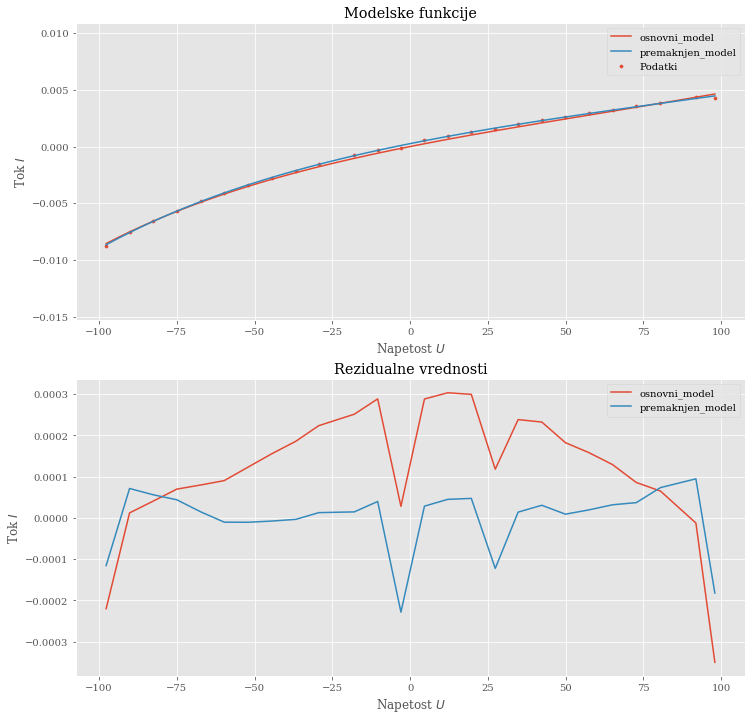

In [10]:

plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Modelske funkcije")
plt.xlabel(r"Napetost $U$")
plt.ylabel(r"Tok $I$")
plt.scatter(x,y,label="Podatki", s=10)
plt.legend()

plt.subplot(212)
plt.title("Rezidualne vrednosti")
plt.xlabel(r"Napetost $U$")
plt.ylabel(r"Tok $I$")


razpon = np.linspace(x.min(), x.max(), 200)
slovar = dict(
    osnovni_model=[2.63175985e-03, 1.38703844e+02, 7.40120793e+01], 
    premaknjen_model=[3.15226953e-03,  1.97990512e+02,  7.66118399e+01, -4.60851976e+00]
)
for model in modelske_funkcije:
    print("*****FItam model:", model.__name__)
    popt, pcov = curve_fit(model, x,y,p0=slovar[model.__name__], method="lm")
    print("     ******POPT: ", popt, sep="\n    ")
    print("     ******PCOV: ", array_to_latex_matrix(pcov), sep="\n    ")
    print("     ******korelacijska matrika:", array_to_latex_matrix(kormat(pcov)), sep="\n    ")
    print("     ******reduciran Hi-kvadrat:",r"\chi^2_\mathrm{{red.}} = {:.3g}".format(hikvadrat(y,x,model, *popt)), sep="\n    ")
    print("     ******Rišem ........\n\n")
    plt.subplot(211)
    plt.plot(razpon, model(razpon, *popt), label=model.__name__)
    plt.subplot(212)
    plt.plot(x, y-model(x, *popt), label=model.__name__)

plt.subplot(211)
plt.legend()
plt.subplot(212)
plt.legend()

plt.savefig("3-1-1-fita.pdf")
plt.savefig("3-1-1-fita.jpg")    
plt.show()

In [5]:
np.exp(0)

1.0